In [1]:
import screed
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from mpltools import style
import mpld3
#from mpld3 import plugins
#import jinja2
#from mpld3._objects import D3Line2D, D3Collection
#mpld3.disable_notebook()

/opt/anaconda/lib/python2.7/site-packages/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)


In [2]:
style.use("ggplot")

In [3]:
%matplotlib inline

In [4]:
ir1 = "/var/seq_data/Chazy/515_806_SIP/Pool2/Index1.fastq"
ir2 = "/var/seq_data/Chazy/515_806_SIP/Pool2/Index2.fastq"

In [5]:
screed.read_fastq_sequences(ir1)
screed.read_fastq_sequences(ir2)

<ScreedDB, '/var/seq_data/Chazy/515_806_SIP/Pool2/Index2.fastq_screed'>

In [5]:
ir1db = screed.ScreedDB(ir1)
ir2db = screed.ScreedDB(ir2)

In [6]:
df_map = pd.read_csv("data/Metadata_ChazySIP_pool2_515806.txt", delimiter="\t", usecols=[1,6,7], names=["SampleID","i1","i2"])
df_map

,SampleID,i1,i2
0,Full.sample,Rev.index,Fwd.index
1,12C.PTH.D3.R4.Frac22,cgagagtt,atcgtacg
2,12C.PTH.D3.R4.Frac23,cgagagtt,actatctg
3,12C.PTH.D3.R4.Frac24,cgagagtt,tagcgagt
4,12C.PTH.D3.R4.Frac25,cgagagtt,ctgcgtgt
5,12C.PTH.D3.R4.Frac26,cgagagtt,tcatcgag
6,12C.PTH.D3.R4.Frac27,cgagagtt,cgtgagtg
7,12C.PTH.D3.R4.Frac28,cgagagtt,ggatatct
8,12C.PTH.D3.R4.H2O,cgagagtt,gacaccgt
9,13X.PTH.D14.R4.Frac6,gacatagt,atcgtacg


In [7]:
map_d = dict(map(lambda x: (x[0] + x[1], x[2]), zip(df_map.i1, df_map.i2, df_map.SampleID)))
print map_d.keys()[10], map_d[map_d.keys()[10]]

tatagcgatcatcgag 13X.NTH.D14.R4.Frac16


In [8]:
print map_d

{'tgagtacgactatctg': '13C.PTH.D3.R4.Frac6', 'tatagcgagacaccgt': '13X.NTH.D14.R4.Frac19', 'tatagcgatacgagac': '12C.NTH.D30.R4.Frac13', 'actacgacgatcgtgt': '13X.NTH.D7.R4.Frac17', 'gtctatgactgcgtgt': '13X.NTH.D14.R4.Frac7', 'tagtctccggatatct': '13C.PTH.D3.R4.Frac27', 'tatagcgaactatctg': '13X.NTH.D14.R4.Frac13', 'actcactgggatatct': '13X.PTH.D14.R4.Frac28', 'tagtctcctacgagac': '12C.NTH.D7.R4.Frac22', 'cgagcgactcgacgag': '13X.NTH.D7.R4.Frac8', 'tatagcgatcatcgag': '13X.NTH.D14.R4.Frac16', 'tagtctccatcgtacg': '13C.PTH.D3.R4.Frac21', 'cgagcgacacgtctcg': '13X.NTH.D7.R4.Frac7', 'tagtctccacgtctcg': '12C.NTH.D7.R4.Frac23', 'acgctacttcatcgag': '13X.PTH.D14.R4.Frac18', 'acgctactctgcgtgt': '13X.PTH.D14.R4.Frac17', 'ctgcgtagactatctg': '13C.PTH.D3.R4.Frac14', 'actacgaccgtgagtg': '13X.PTH.D1.R4.Frac18', 'acgctacttcgacgag': '13C.PTH.D30.R4.Frac16', 'gtctgctatacgagac': '13X.NTH.D7.R4.Frac22', 'tagtctccgtcagata': '12C.NTH.D7.R4.Frac26', 'gtctatgacgtgagtg': '13X.NTH.D14.R4.Frac9', 'actcactgtagcgagt': '13X.P

In [11]:
screed.read_fastq_sequences("/var/seq_data/Chazy/515_806_SIP/Pool2/pear_merged_raw-2015-08-15.assembled.fastq_screed")

<ScreedDB, '/var/seq_data/FungalSIP/pear_merged_raw-2014-04-24.assembled.fastq_screed'>

In [9]:
db = screed.ScreedDB("/var/seq_data/Chazy/515_806_SIP/Pool2/pear_merged_raw-2015-08-15.assembled.fastq_screed")

In [10]:
counter = 0
unassigned = 0
cnt = Counter()
fn = "/var/seq_data/Chazy/515_806_SIP/Pool2/pear_merged_raw-2015-08-15.assembled.dmult.fastq"
with open(fn, "w") as out:
    for rec in db.itervalues():
        index_concat = ir1db[rec["name"]]["sequence"] + ir2db[rec["name"]]["sequence"]
        try:
            new_name = map_d[index_concat.lower()] + "_" + str(counter) #case sensitive
        except KeyError:
            unassigned += 1
            continue
        counter += 1
        cnt[map_d[index_concat.lower()]] += 1 #case sensitive
        s, q = rec["sequence"], rec["accuracy"]
        out.write("@%s orig_name=%s\n%s\n+\n%s\n"%(new_name,rec["name"],s,q))
print "Unable to assign %s reads to samples"%unassigned

Unable to assign 1299617 reads to samples


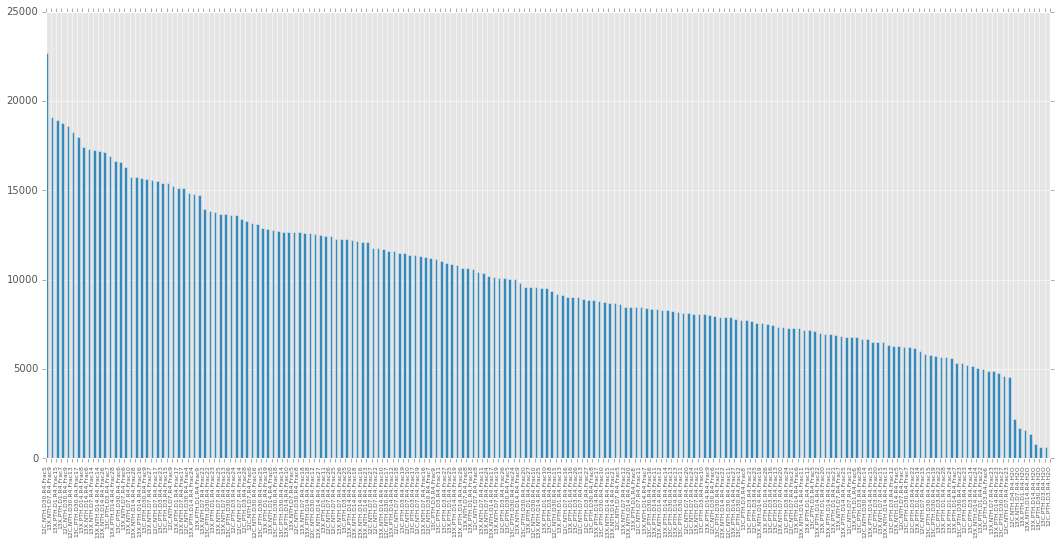

In [11]:
X = np.arange(len(cnt.keys()))
Y = [v for k, v in cnt.most_common()]
fig = plt.figure()
fig.set_size_inches((18,8))
ax = fig.add_subplot(111)
bars = ax.bar(X, Y, width=0.50)
xlims = ax.set_xlim((X.min(), X.max()))
xt = ax.set_xticks(X)
xtl = ax.set_xticklabels([k for k, v in cnt.most_common()], rotation=90, ha="center", size=6)